# Lecture 5
1. Regression
2. Linear Regression
3. Ordinary Least Squares


## 1. Regression
Regression is one of the most well-known and widely used machine learning tool.

We will cover here some of its most important aspects.

### Relationships between Variables

Consider a situation where you are interested to determine the association between two (or more) pieces of information. For examples:

1. the relation of the height of a child compared to that of her parents
2. the relation of ice cream sales and outdoor temperature
3. the relation of animals' body size and their brain size

We can collect data for these events and use it for constructing a **model** that enables us to explore the relationship between the variables in question

Ultimately, our goal is to use our model to predict the outcome of the variable of interest given the values of the other variable(s).


### Variables

* $\mathbf{y}$: We usually call the quantity of interest the **response** or **dependent** variable and denote it with the variable $\mathbf{y}$.

* $\mathbf{x}$: The other quantities are called **predictors**, **regressors** or **independent** variables and denote them as $\mathbf{x}$.

we say that two quantities are *correlated* if there is relationship between the two variables, i.e., the value of one
tells us something about the value of the other one.

We use regression to discover this underlying relationship.

### Before we continue...
1. Just because we measure a correlation between two variables, it does not mean that there is a causal relationship between them.

* The fact that people use umbrellas when it rains does not mean that umbrellas cause rain to fall.

 

2. we must be careful when considering relationships between variables as they may be related to a third, confounding, variable

* As Summer approaches, the ice cream van is busy selling more ice cones. A similar trend has been noted for the murder rates, as the heat rises, the number of murders do too. (New York Times: Jun 18th, 2009)

* More ice cream sales causes more murders?

* Always be on the lookout for confounding variables.

### Regression towards the mean
is a statistical phenomenon and can be seen as a fact of life.

* (Galton, F. 1886) Tall parents are likely to have a child that is taller than average. However, the child is likely to be less tall than the parents. Short parents are likely to have children taller than the parents, but still below the average. This is true for both animals and plants.

* A sprinter that breaks the world record in an a race is expected to run to his/her average time in the next one.

This phenomenon is the foundation of regression analysis.

## 2. Linear Regression
As a first attempt to determining the dependence among the variables, the simplest thing we can do is check if the relationship follows a **straight line**.

$$\mathbf{y} = f(\mathbf{x})+\varepsilon$$
* $f(\cdot)$: a linear function
* $\varepsilon$: noise

$$\mathbf{y} = \beta_0+ \beta_1\mathbf{x}+\varepsilon$$
* $\beta_0,\beta_1$: regression coefficients
* #beta1 is the slope and beta0 is the offset

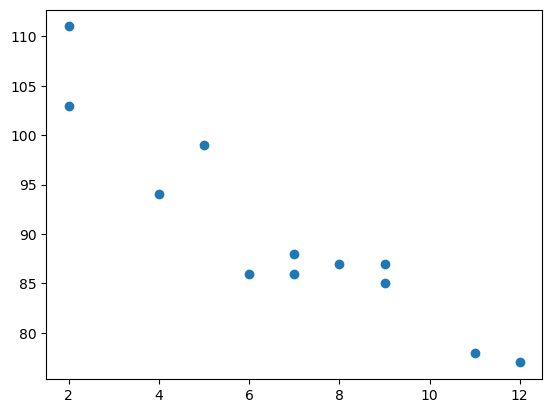

In [3]:
import matplotlib.pyplot as plt

x = [5,7,8,7,2,2,9,4,11,12,9,6]
y = [99,86,87,88,111,103,87,94,78,77,85,86]

plt.scatter(x, y)
plt.show()

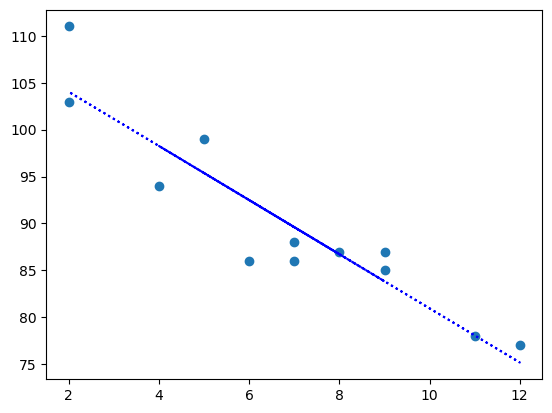

In [7]:
from scipy import stats

beta_1, beta_0, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return beta_0 + beta_1 * x

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel,'b:') #can do 'b. ' for just dotted points to make the line   -or-    'b- ' for solid line / and can change b (representing blue) to any color
plt.show()

This is the "best" line that fits these data points, but best in what sense? We will discuss later. 

### r for Relationship
It is important to know how the relationship between the values of the x-axis and the values of the y-axis is, if there are no relationship the linear regression can not be used to predict anything.

This relationship - the coefficient of correlation - is called r value.

The r value ranges from -1 to 1, where 0 means no relationship, and 1 (and -1) means 100% related.

In [11]:
print(r)

-0.9275859617560784


Now we can use this model to predict $\mathbf{y}$'s value when $\mathbf{x}=6$

92.48680351906158


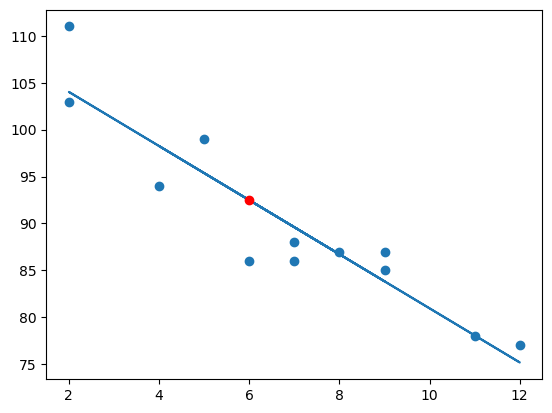

In [15]:
response = myfunc(6)

print(response)

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.plot(6, response, 'ro')
plt.show()

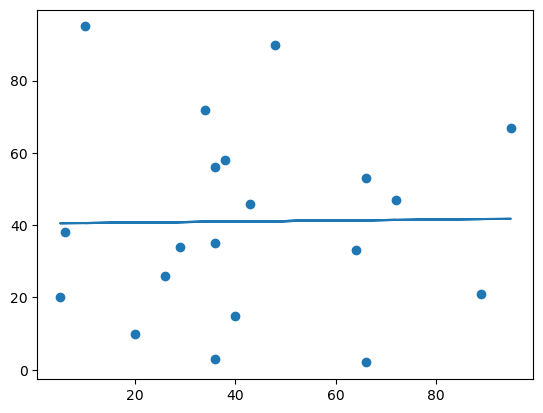

In [17]:
x = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

beta_1, beta_0, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return beta_0 + beta_1 * x

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [19]:
print(p)

0.9555588004401059


How about p-value? [Read](https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/) after class.

### Multivariate Linear Regression
We can extend the model to include many more variables. Let's say have

* $\mathbf{y}=[y_1,y_2,...,y_n]^T$
* $\mathbf{x}_j=[x_{1j},x_{2j},...,x_{nj}]^T, ~~ \forall j=1,2,...,m$

This is saying that we have multi-dimensional information in each of $m$ data points, and we are interested in predicting something more complicated than a single number. 

The multivariate linear regression model is written as:
$$y_i = \beta_0+ \sum_{j=1}^{m}\beta_j \mathbf{x}_j+\varepsilon_i, ~~~ \forall i=1,2,...,n \text{ and } j=1,2,...,m.$$

Writing in the matrix and vector forms:
$$\mathbf{X}=\left(\begin{matrix} 1 & x_{11} & x_{12} & ... &x_{1m}\\ 1 & x_{21} & x_{22} & ... &x_{2m}\\ \vdots & \vdots & \vdots & \vdots & \vdots\\ 1 & x_{n1} & x_{n2} & ... &x_{nm}\\\end{matrix}\right), \mathbf{\beta}=\left(\begin{matrix} \beta_0 \\ \beta_1 \\\beta_2 \\ \vdots \\\beta_m\end{matrix}\right)$$
$$\mathbf{y}=\left(\begin{matrix} y_1 \\y_2 \\ \vdots \\y_n\end{matrix}\right), \mathbf{\varepsilon}=\left(\begin{matrix} \varepsilon_1 \\\varepsilon_2 \\ \vdots \\\varepsilon_n\end{matrix}\right)$$

We end up with the following form for the regression model:
$$\mathbf{y}=\mathbf{X}\mathbf{\beta}+\mathbf{\varepsilon}$$

Our task is therefore to find the regression coefficients in the vector $\mathbf{\beta}$.

* By the way, the textbook is full of typos in this chapter...

## 3. Ordinary Least Squares

We are tasked with finding the regression coefficients $\mathbf{\beta}$ in the multivariate regression model.

If we were able to craft a perfect linear model, the actual value of $\mathbf{y}$ would match exactly the prediction
$f(\mathbf{x}_1, \mathbf{x}_2, ...,\mathbf{x}_m)$. This implies that the residuals $\mathbf{\varepsilon}=\mathbf{0}$.

In a more realistic scenario, we would find a good line of best fit to the data points by minimizing the error. One way to implement a suitable objective function for this purpose is to minimize the *sum of squared residuals (SSR)*:
$$\begin{aligned} SSR &=\sum_{i=1}^{n}\varepsilon_i^2=\|\mathbf{\varepsilon}\|_2^2 ~~~~~~~~~~~~~~~~\|\cdot\|_2 \text{ is called $\ell_2$-norm, it equals the Euclidean Distance}\\ &=\|\mathbf{y}-\mathbf{X}\mathbf{\beta}\|_2^2 \\ &=(\mathbf{y}-\mathbf{X}\mathbf{\beta})^T(\mathbf{y}-\mathbf{X}\mathbf{\beta})~~~~~~~~~~~~~~~~~~~~~\text{since }a^T a = a_1^2 + a_2^2 + ...\\&=\mathbf{y}^T\mathbf{y}-\mathbf{\beta}^T\mathbf{X}^T\mathbf{y}-\mathbf{y}^T\mathbf{X}\mathbf{\beta}+\mathbf{\beta}^T\mathbf{X}^T\mathbf{X}\mathbf{\beta}\end{aligned}$$

* This *sum of squared residuals* is how we define the "best" line in Python code above.
* $\mathbf{\beta}^T\mathbf{X}^T\mathbf{y}$ and $\mathbf{y}^T\mathbf{X}\mathbf{\beta}$ are both scalars (single numbers). So $\mathbf{\beta}^T\mathbf{X}^T\mathbf{y}=(\mathbf{\beta}^T\mathbf{X}^T\mathbf{y})^T=\mathbf{y}^T\mathbf{X}\mathbf{\beta}$.

Why is $\mathbf{\beta}^T\mathbf{X}^T\mathbf{y}$ a scalar?

$1\times (m+1)$  $(m+1) \times n$ $n \times 1$

To minimize $SSR$, we we take its derivative with respect to $\mathbf{\beta}$: 
$$\begin{aligned}\frac{\partial (SSR)}{\partial \mathbf{\beta}} &= \frac{\partial}{\partial \mathbf{\beta}}\left( \mathbf{y}^T\mathbf{y}-2\mathbf{\beta}^T\mathbf{X}^T\mathbf{y}+\mathbf{\beta}^T\mathbf{X}^T\mathbf{X}\mathbf{\beta} \right) \\ &= -2\mathbf{X}^T\mathbf{y}+2\mathbf{X}^T\mathbf{X}\mathbf{\beta}\end{aligned}$$
and set it to $\mathbf{0}$. This gives us: 
$$\mathbf{\beta}=\left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{y}$$
This is a closed form solution to the Ordinary Least Squares.

In [27]:
from numpy import array, dot
from scipy import linalg

X = array([[1, 1], [1, 2], [1, 3], [1, 4]])
Y = array([[1], [2], [3], [4]])
temp1 = linalg.inv(dot(X.T, X))
temp2 = dot(X.T, Y)
beta = dot(temp1,temp2)

print(beta)

[[-3.55271368e-15]
 [ 1.00000000e+00]]


__Exercise__: Use the closed form formula $\mathbf{\beta}=\left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{y}$ to verify the results produced by *stats.linregress* in the previous seesion.